,t,y
,<int>,<dbl>
1,1,97.85
2,2,104.64
3,3,94.36
4,4,98.05
5,5,95.85
6,6,95.98


,t,y
,<int>,<dbl>
503,503,73.46
504,504,79.03
505,505,76.56
506,506,78.52
507,507,89.43
508,508,85.49


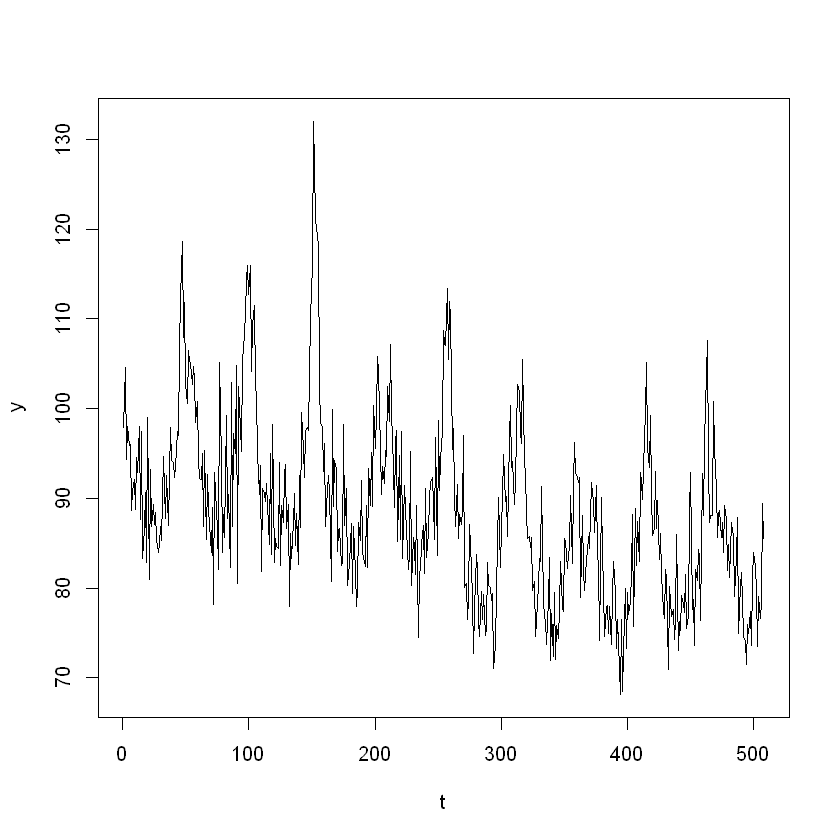

In [1]:
### Linear Mixed Models

############################
### Assignment 1

### 1

cmort <- read.table("cmort.txt", sep="\t", dec=".", head=TRUE)
head(cmort)
tail(cmort)

attach(cmort)
plot(cmort, type = "l")


In [3]:
### a)

library(nlme)
cmort.gls <- gls(y ~ t + I(t^2) + I(t^3) + cos(2*pi*t/52) + sin(2*pi*t/52), data = cmort, correlation = corARMA(p = 1, q = 0)) # AR(1)

summary(cmort.gls)
param.phi <- coef(cmort.gls$model$corStruct, unconstrained = FALSE)
cmort.gls$modelStruct$corStruct # another way of getting param.phi

# Phi 
# 0.3966289 



Generalized least squares fit by REML
  Model: y ~ t + I(t^2) + I(t^3) + cos(2 * pi * t/52) + sin(2 * pi * t/52) 
  Data: cmort 
       AIC      BIC    logLik
  3259.109 3292.858 -1621.555

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.3966289 

Coefficients:
                      Value Std.Error  t-value p-value
(Intercept)        92.37024 1.6500297 55.98095  0.0000
t                   0.07250 0.0280867  2.58124  0.0101
I(t^2)             -0.00052 0.0001282 -4.04773  0.0001
I(t^3)              0.00000 0.0000002  4.18875  0.0000
cos(2 * pi * t/52)  8.88833 0.5803629 15.31512  0.0000
sin(2 * pi * t/52) -1.79199 0.5790545 -3.09468  0.0021

 Correlation: 
                   (Intr) t      I(t^2) I(t^3) c(*p*t
t                  -0.867                            
I(t^2)              0.747 -0.968                     
I(t^3)             -0.664  0.917 -0.986              
cos(2 * pi * t/52) -0.032  0.049 -0.059  0.067       
sin(2 * pi * t/52) -0.102  0.097 -0

Correlation structure of class corAR1 representing
      Phi 
0.3966289 

In [4]:
### b)

cmort.H0 <- gls(y ~ t + I(t^2) + I(t^3), data = cmort, correlation = corARMA(p = 1, q = 0), method = "ML")
summary(cmort.H0)

cmort.H1 <- gls(y ~ t + I(t^2) + I(t^3) + cos(2*pi*t/52) + sin(2*pi*t/52), data = cmort, correlation = corARMA(p = 1, q = 0), method = "ML")
summary(cmort.H1)

anova(cmort.H0, cmort.H1)
# value of test statistic = 113.9913
# p-value = 0.0001

Generalized least squares fit by maximum likelihood
  Model: y ~ t + I(t^2) + I(t^3) 
  Data: cmort 
       AIC      BIC    logLik
  3311.454 3336.837 -1649.727

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.7030604 

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 92.93801  3.616800 25.696199  0.0000
t            0.05603  0.061739  0.907599  0.3645
I(t^2)      -0.00042  0.000282 -1.504307  0.1331
I(t^3)       0.00000  0.000000  1.515344  0.1303

 Correlation: 
       (Intr) t      I(t^2)
t      -0.860              
I(t^2)  0.736 -0.967       
I(t^3) -0.651  0.915 -0.986

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.9246823 -0.7595693 -0.1229799  0.5936894  4.3925913 

Residual standard error: 8.747641 
Degrees of freedom: 508 total; 504 residual

Generalized least squares fit by maximum likelihood
  Model: y ~ t + I(t^2) + I(t^3) + cos(2 * pi * t/52) + sin(2 * pi * t/52) 
  Data: cmort 
       AIC      BIC    logLik
  3201.462 3235.306 -1592.731

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.3800342 

Coefficients:
                      Value Std.Error  t-value p-value
(Intercept)        92.37362 1.6067839 57.48976  0.0000
t                   0.07247 0.0273480  2.64983  0.0083
I(t^2)             -0.00052 0.0001249 -4.15689  0.0000
I(t^3)              0.00000 0.0000002  4.30230  0.0000
cos(2 * pi * t/52)  8.88923 0.5652064 15.72741  0.0000
sin(2 * pi * t/52) -1.79271 0.5639153 -3.17905  0.0016

 Correlation: 
                   (Intr) t      I(t^2) I(t^3) c(*p*t
t                  -0.867                            
I(t^2)              0.747 -0.968                     
I(t^3)             -0.664  0.917 -0.986              
cos(2 * pi * t/52) -0.032  0.049 -0.059  0.067       
sin(2 * pi * t/52) -0

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
cmort.H0,"gls(model = y ~ t + I(t^2) + I(t^3), data = cmort, correlation = corARMA(p = 1, q = 0), method = ""ML"")",1,6,3311.454,3336.837,-1649.727,,NA,NA
cmort.H1,"gls(model = y ~ t + I(t^2) + I(t^3) + cos(2 * pi * t/52) + sin(2 * pi * t/52), data = cmort, correlation = corARMA(p = 1, q = 0), method = ""ML"")",2,8,3201.462,3235.306,-1592.731,1 vs 2,113.9913,1.766453e-25


In [5]:
### c)

nn<-dim(cmort)[1]+1
T<-data.frame(t=1:nn)
cs<-corARMA(param.phi,form = ~ 1, p=1,q=0)
cs<-Initialize(cs, data = T)

Sigma<-corMatrix(cs)
V<-Sigma[1:(nn-1),1:(nn-1)]
w<-Sigma[1:(nn-1),nn]

xf<-t(t(c(1, 509, 509^2, 509^3, sin(2 * pi * 509/52), cos(2 * pi * 509/52))))
beta<-coef(cmort.gls)
X<-model.matrix(~t+I(t^2)+I(t^3)+sin(2*pi*t/52)+cos(2*pi*t/52), data=cmort)
y<-cmort$y

blup<-t(xf)%*%beta+t(w)%*%solve(V)%*%(y-X%*%beta)
blup # 80.526

#
newdata<-data.frame(t=509)
predict(cmort.gls, newdata=newdata)+t(w)%*%solve(V)%*%residuals(cmort.gls) # 88.73609

predict(cmort.gls, newdata=newdata) # 90.14715
predict(cmort.gls, newdata=newdata)+param.phi*residuals(cmort.gls)[508] # 88.73609 

80.526


88.73609


[1] 90.14715
attr(,"label")
[1] "Predicted values"

Phi 
88.73609 
attr(,"label")
[1] "Predicted values"

,Tree.ID,Age,Forest.ID,dbhib.cm,height.m
,<int>,<int>,<chr>,<dbl>,<dbl>
1,1,55,Clearwater,37.084,21.76272
2,1,45,Clearwater,31.496,18.71472
3,1,35,Clearwater,22.352,12.22248
4,1,25,Clearwater,17.780,8.71728
5,1,15,Clearwater,10.160,5.97408
6,2,107,Clearwater,50.800,31.51632


The following objects are masked from stageforest (pos = 3):

    Age, dbhib.cm, Forest.ID, height.m, Tree.ID


The following objects are masked from stageforest (pos = 6):

    Age, dbhib.cm, Forest.ID, height.m, Tree.ID


The following objects are masked from stageforest (pos = 7):

    Age, dbhib.cm, Forest.ID, height.m, Tree.ID


Warning message:
"Some predictor variables are on very different scales: consider rescaling"


Linear mixed model fit by REML ['lmerMod']
Formula: height.m ~ dbhib.cm + I(dbhib.cm^2) + (1 | Forest.ID)
   Data: stageforest

REML criterion at convergence: 2963

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3766 -0.6120 -0.0051  0.5770  3.6221 

Random effects:
 Groups    Name        Variance Std.Dev.
 Forest.ID (Intercept)  2.768   1.664   
 Residual              12.873   3.588   
Number of obs: 542, groups:  Forest.ID, 9

Fixed effects:
               Estimate Std. Error t value
(Intercept)   -0.109898   0.755232  -0.146
dbhib.cm       0.852766   0.031559  27.021
I(dbhib.cm^2) -0.002696   0.000430  -6.270

Correlation of Fixed Effects:
            (Intr) dbhb.c
dbhib.cm    -0.602       
I(dbhb.c^2)  0.521 -0.961
fit warnings:
Some predictor variables are on very different scales: consider rescaling

(Intercept)      dbhib.cm I(dbhib.cm^2) 
 -0.109898319   0.852766507  -0.002695893

$Forest.ID
             (Intercept)
Clark Fork    2.35644732
Clearwater    0.73764720
Coeur dAlene -1.32142259
Kaniksu       0.47032821
Nez Perce     0.92702912
Payette      -1.63361240
St. Joe       1.15413051
Umatilla     -2.67522852
Wallowa      -0.01531885

with conditional variances for "Forest.ID" 

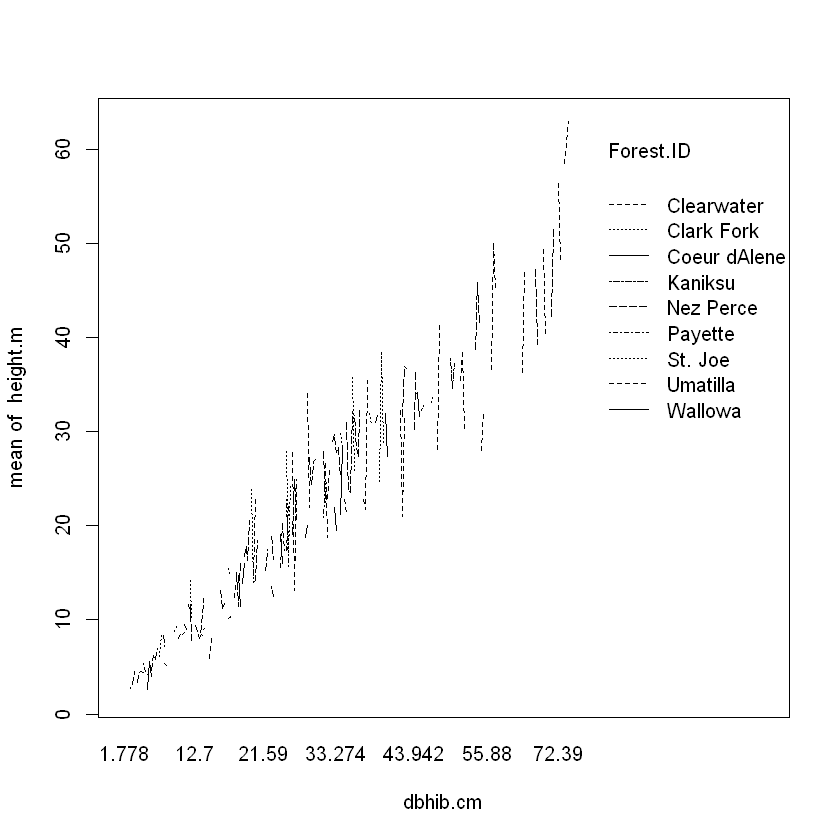

In [22]:

### 2

stageforest <- read.table("stageforest.txt", sep="\t", dec=".", header=TRUE)
head(stageforest)

attach(stageforest)
interaction.plot(dbhib.cm, Forest.ID, height.m)

library(lme4)

stageforest.model <- lmer(height.m ~ dbhib.cm + I(dbhib.cm^2) + (1|Forest.ID), data=stageforest)

summary(stageforest.model)
fixef(stageforest.model) # fixed effects values
ranef(stageforest.model) # random effects values

In [23]:
## a)

VarCorr(stageforest.model)
print(VarCorr(stageforest.model), comp="Variance")
as.numeric(VarCorr(stageforest.model)) # [1] 2.767964

### b)

ranef(stageforest.model)
ranef(stageforest.model)$Forest.ID[[1]][1] # 2.356447

# $Forest.ID
#               (Intercept)
# Clark Fork    2.35644732
# Clearwater    0.73764720
# Coeur dAlene -1.32142259
# Kaniksu       0.47032821
# Nez Perce     0.92702912
# Payette      -1.63361240
# St. Joe       1.15413051
# Umatilla     -2.67522852
# Wallowa      -0.01531885

# Ans: Clark Fork

 Groups    Name        Std.Dev.
 Forest.ID (Intercept) 1.6637  
 Residual              3.5878  

 Groups    Name        Variance
 Forest.ID (Intercept)  2.768  
 Residual              12.873  


[1] 2.767964

$Forest.ID
             (Intercept)
Clark Fork    2.35644732
Clearwater    0.73764720
Coeur dAlene -1.32142259
Kaniksu       0.47032821
Nez Perce     0.92702912
Payette      -1.63361240
St. Joe       1.15413051
Umatilla     -2.67522852
Wallowa      -0.01531885

with conditional variances for "Forest.ID" 

[1] 2.356447

In [24]:
### c)

model.2<-lmer(height.m ~ dbhib.cm + I(dbhib.cm^2) + (1+dbhib.cm|Tree.ID) + (1|Forest.ID), data=stageforest)
summary(model.2)
ranef(model.2)

newdata<-data.frame(Tree.ID=67, Forest.ID="Wallowa", dbhib.cm=35.5)
mu.hat<-predict(model.2, newdata=newdata, re.form=NA)
mu.hat
mu.pred<-predict(model.2, newdata=newdata)
mu.pred # 27.79635: point prediction part <- FE+RE

Warning message:
"Some predictor variables are on very different scales: consider rescaling"


Linear mixed model fit by REML ['lmerMod']
Formula: height.m ~ dbhib.cm + I(dbhib.cm^2) + (1 + dbhib.cm | Tree.ID) +  
    (1 | Forest.ID)
   Data: stageforest

REML criterion at convergence: 2256.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1068 -0.5848  0.0128  0.5129  4.7127 

Random effects:
 Groups    Name        Variance Std.Dev. Corr 
 Tree.ID   (Intercept) 5.624836 2.37167       
           dbhib.cm    0.007963 0.08924  -0.24
 Forest.ID (Intercept) 0.498570 0.70610       
 Residual              1.944565 1.39448       
Number of obs: 542, groups:  Tree.ID, 66; Forest.ID, 9

Fixed effects:
                Estimate Std. Error t value
(Intercept)   -1.0769867  0.4526929  -2.379
dbhib.cm       0.9336657  0.0187570  49.777
I(dbhib.cm^2) -0.0038961  0.0002404 -16.207

Correlation of Fixed Effects:
            (Intr) dbhb.c
dbhib.cm    -0.452       
I(dbhb.c^2)  0.368 -0.756
fit warnings:
Some predictor variables are on very different scales: consider rescaling

$Tree.ID
   (Intercept)     dbhib.cm
1  -2.44311574 -0.115177160
2  -3.10996854 -0.085497304
3  -1.68437526 -0.050037774
4  -1.02366232 -0.006808005
5   0.22125198 -0.019731496
6   3.52539769 -0.039361127
7   4.04432927 -0.032804619
11  2.77012389 -0.157257913
12 -1.22428082 -0.055690046
13 -0.94062519 -0.016921427
15  1.73353609  0.043021433
17  1.88657490 -0.143762187
18 -0.13328913  0.085953398
19  2.01839642 -0.014577840
28  0.16203675  0.043677152
29  1.71608958  0.124483914
30  0.19326904  0.059491859
31  7.27905791  0.050680127
32 -0.16077542 -0.059482092
33 -0.60047072  0.114744290
34 -4.90317483  0.103725850
35 -0.37985288  0.006525241
36  0.15952636  0.018072237
37  0.87946448  0.052288059
38 -0.67630051 -0.135892432
39 -3.54585089  0.030669493
40 -0.63410671 -0.030121051
41 -0.02435029  0.012328098
42 -1.01010751 -0.026961528
43  0.64013817  0.060226273
44 -0.56233419 -0.125992034
45 -0.34435137 -0.052365473
46  0.48281959 -0.102739082
47 -0.39997226  0.054228121
48  2.28359

1 
27.15812

1 
27.79635

In [25]:
### d)

X<-getME(model.2, "X")
xf<-t(t(c(1,35.5,35.5^2)))
beta<-t(t(fixef(model.2)))

b1<-as.numeric(stack(data.frame(t(ranef(model.2)$Tree.ID)))[,1])
b2<-as.numeric(stack(ranef(model.2)$Forest.ID)[,1])
b<-t(t(c(b1,b2)))

levels(factor(Tree.ID))
## 54

Z<-getME(model.2, "Z")
zf<-t(t(rep(0,141)))
zf[107]<-1
zf[108]<-35.5
zf[141]<-1
zf<-as.matrix(zf)

blup<-t(xf)%*%beta+t(zf)%*%b
blup

sigma2<-sigma(model.2)^2 # 1.944565

ST<-getME(model.2, "ST")$Tree.ID
S<-diag(diag(ST))
T<-ST-S+diag(2)
F1<-T%*%S%*%S%*%t(T)
cov.bi1<-sigma2*F1
cov.bi1
G1<-kronecker(diag(66), F1)

ST<-getME(model.2, "ST")$Forest.ID
F2<-ST^2
cov.bh<-sigma2*F2
cov.bh
G2<-kronecker(diag(9), F2)

zero<-matrix(0, ncol=9, nrow=132)
G<-rbind(cbind(G1,zero),cbind(t(zero),G2))
cov.b<-sigma2*G 
cov.b

V<-diag(dim(X)[1])+Z%*%G%*%t(Z)
cov.y<-sigma2*V
cov.y

### Prediction interval - Asymptotic method

V<-diag(dim(X)[1])+Z%*%G%*%t(Z)
w<-Z%*%G%*%zf
vf<-1+t(zf)%*%G%*%zf

var.error<-sigma2*(vf-t(w)%*%solve(V)%*%w+(t(xf)-t(w)%*%solve(V)%*%X)%*%solve(t(X)%*%solve(V)%*%X)%*%(xf-t(X)%*%solve(V)%*%w))

lowerbound<-blup-qnorm(0.9)*sqrt(var.error)
lowerbound # 25.66676

upperbound<-blup+qnorm(0.9)*sqrt(var.error)
upperbound # 29.92594

### Prediction interval - Quantiles method
### Here, we only need the point prediction and sigma2

lowerbound<-qnorm(0.1, mean=mu.pred, sd=sqrt(sigma2))
lowerbound # 26.00926

upperbound<-qnorm(0.9, mean=mu.pred, sd=sqrt(sigma2))
upperbound #  29.58345


[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "11" "12" "13" "15" "17" "18" "19" "28"
[16] "29" "30" "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43"
[31] "44" "45" "46" "47" "48" "49" "50" "51" "52" "53" "54" "55" "56" "57" "58"
[46] "59" "60" "61" "62" "63" "64" "65" "66" "67" "68" "69" "70" "71" "72" "73"
[61] "74" "75" "76" "77" "84" "85"

27.79635


5.62483593,-0.05160144
-0.05160144,0.00796296


0.4985704


5.62483593,-0.05160144,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0
-0.05160144,0.00796296,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.00000000,5.62483593,-0.05160144,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.00000000,-0.05160144,0.00796296,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,5.62483593,-0.05160144,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,-0.05160144,0.00796296,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5.62483593,-0.05160144,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.05160144,0.00796296,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5.62483593,-0.05160144,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.05160144,0.00796296,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0


542 x 542 sparse Matrix of class "dgCMatrix"
                                                                     
  [1,] 15.1916419 11.8852985 9.6569333 8.5427507 6.6857797  0.4985704
  [2,] 11.8852985 12.7167338 8.9506847 8.0399425 6.5220388  0.4985704
  [3,]  9.6569333  8.9506847 9.7395699 7.2171655 6.2540992  0.4985704
  [4,]  8.5427507  8.0399425 7.2171655 8.7503416 6.1201294  0.4985704
  [5,]  6.6857797  6.5220388 6.2540992 6.1201294 7.8414110  0.4985704
  [6,]  0.4985704  0.4985704 0.4985704 0.4985704 0.4985704 23.3747985
  [7,]  0.4985704  0.4985704 0.4985704 0.4985704 0.4985704 20.3545429
  [8,]  0.4985704  0.4985704 0.4985704 0.4985704 0.4985704 18.7410067
  [9,]  0.4985704  0.4985704 0.4985704 0.4985704 0.4985704 17.7549567
 [10,]  0.4985704  0.4985704 0.4985704 0.4985704 0.4985704 16.0517796
 [11,]  0.4985704  0.4985704 0.4985704 0.4985704 0.4985704 13.9900388
 [12,]  0.4985704  0.4985704 0.4985704 0.4985704 0.4985704 13.0039888
 [13,]  0.4985704  0.4985704 0.4985704 0.4985

1 x 1 Matrix of class "dgeMatrix"
         [,1]
[1,] 25.66676

1 x 1 Matrix of class "dgeMatrix"
         [,1]
[1,] 29.92594

[1] 26.00926

[1] 29.58345